In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import unittest

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

def run_tests():
  unittest.main(argv=[''], verbosity=1, exit=False)

# Load the data

Data [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [3]:
!wget https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
df_train = pd.read_csv("C:/Users/lizab/Downloads/Book1.csv")

# Data exploration

In [6]:
df_train.shape

(499, 75)

In [4]:
df_train['price'].describe()

count     499.000000
mean      130.903808
std       385.051557
min        13.000000
25%        65.000000
50%        90.000000
75%       137.000000
max      8509.000000
Name: price, dtype: float64

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


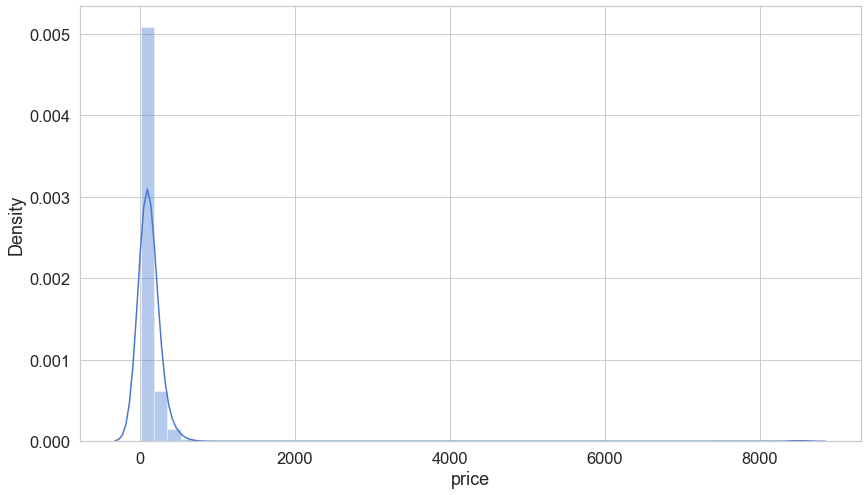

In [5]:
sns.distplot(df_train['price']);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


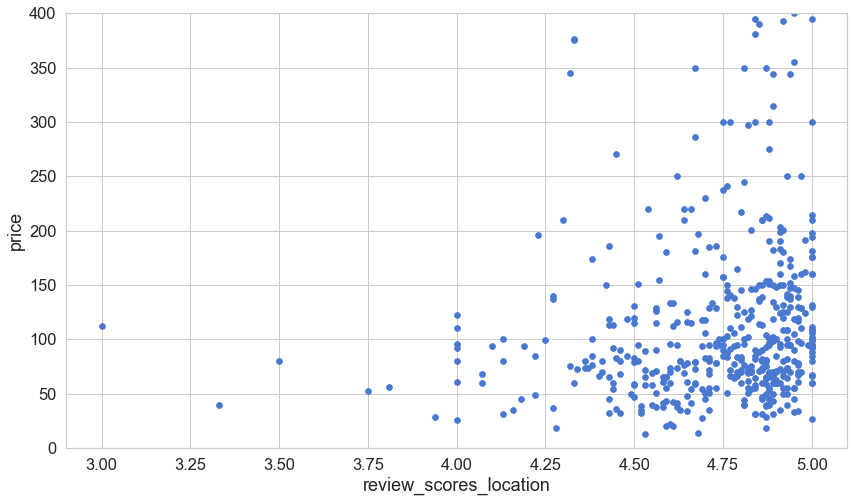

In [7]:
var = 'review_scores_location'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,400), s=32);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


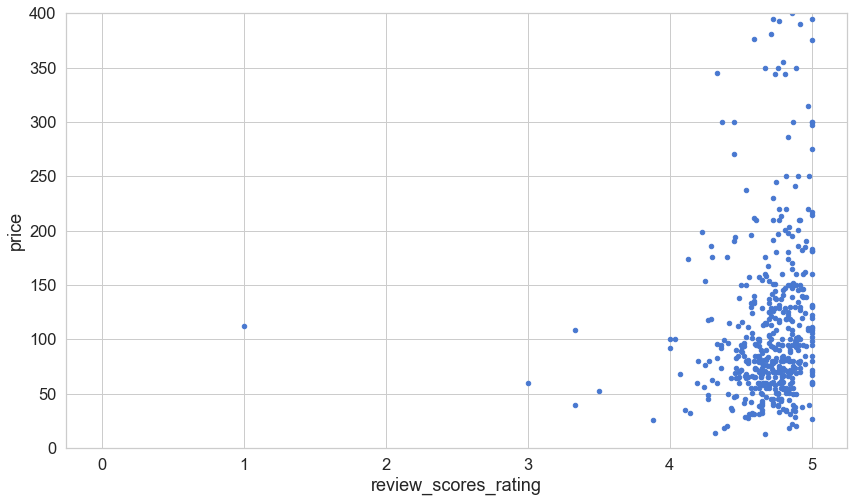

In [8]:
var = 'review_scores_rating'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,400));

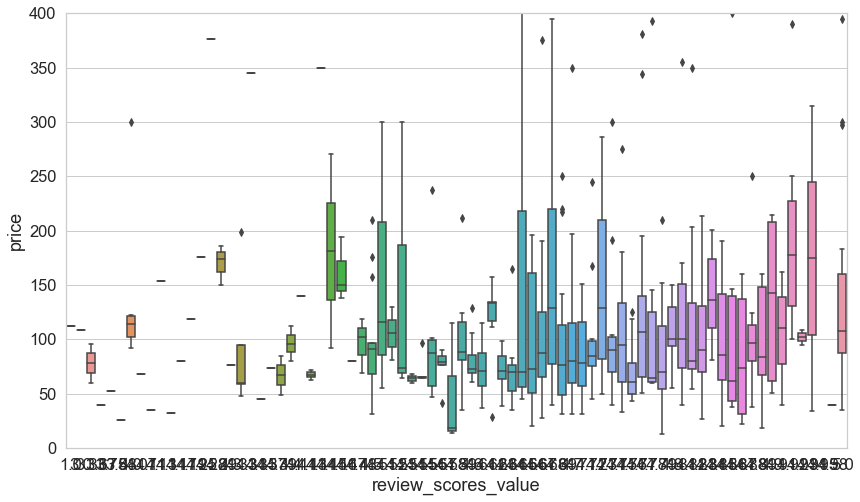

In [10]:
var = 'review_scores_value'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=400);

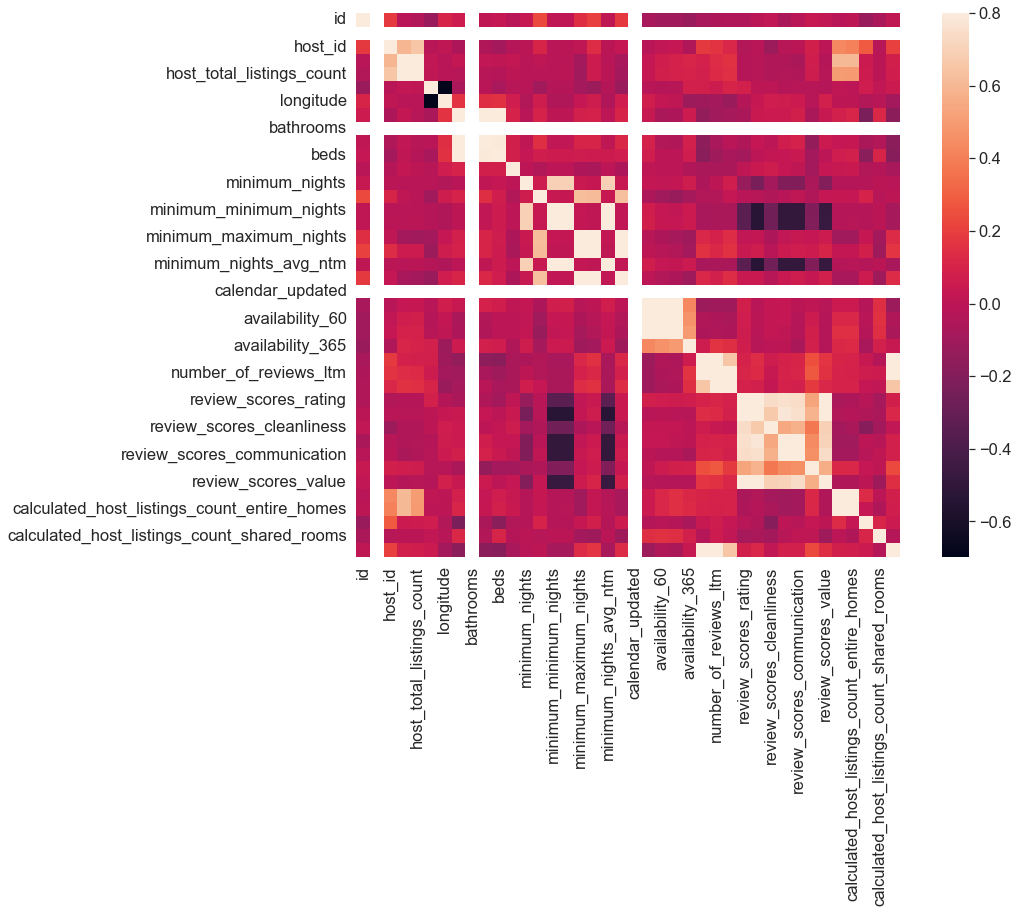

In [8]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, vmax=.8, square=True);

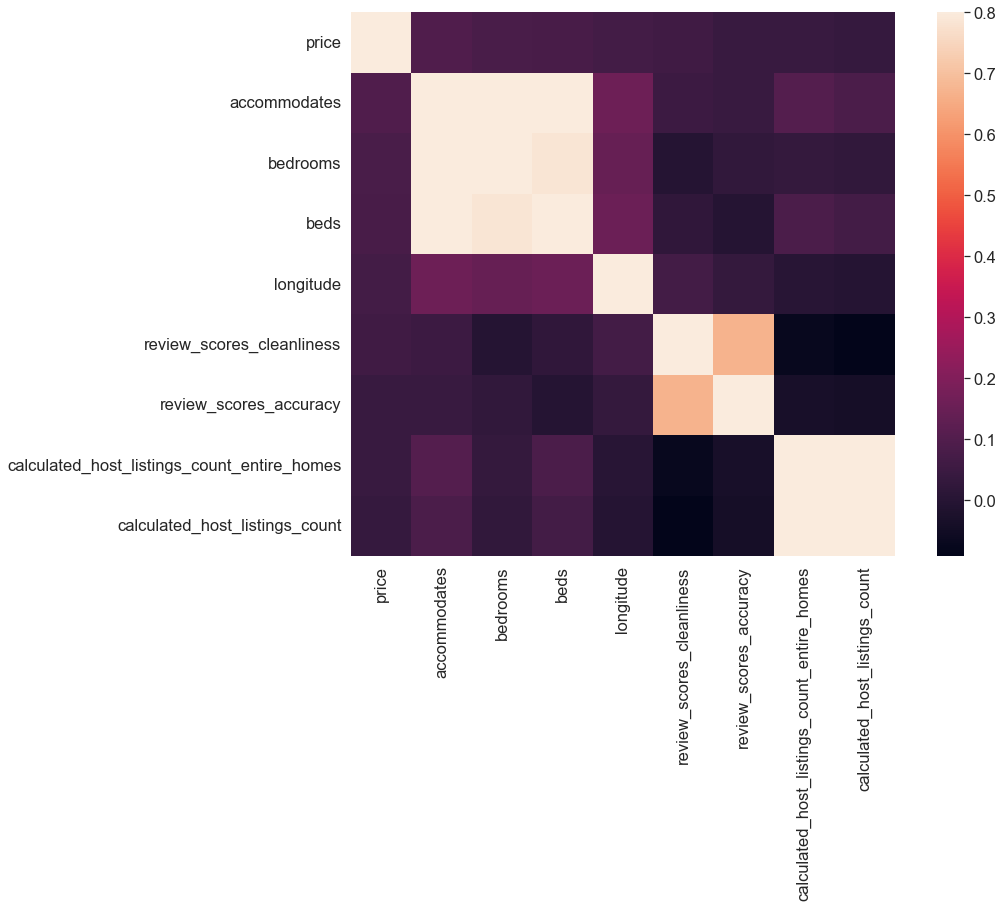

In [9]:
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_train[cols].corr(), vmax=.8, square=True);

D:\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


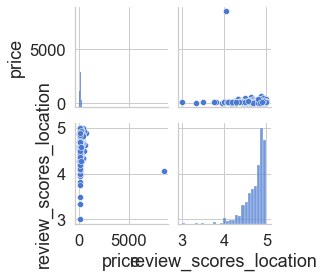

In [15]:
cols = ['price', 'review_scores_location', ]
sns.pairplot(df_train[cols], size = 2);

## Do we have missing data?

In [6]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
bathrooms,499,1.000000
calendar_updated,499,1.000000
host_neighbourhood,492,0.985972
neighborhood_overview,183,0.366733
neighbourhood,183,0.366733
license,123,0.246493
bedrooms,105,0.210421
host_response_time,80,0.160321
host_response_rate,80,0.160321
host_about,58,0.116232
